<a href="https://colab.research.google.com/github/taxfree-python/2022-4Q-jouri-/blob/master/jouri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考にした記事](https://lascode.com/newton-fractal/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
search_range = [-1, 1, -1, 1]
resolution = [1000, 1000]

In [10]:
def func(z):
    f = z ** 4 + z ** 3 + z ** 2 + 1
    df = 4 * z ** 3 + 2 * z ** 2 + 2 * z

    return f, df

In [4]:
def newtowns_method(z):
    if func(z)[1] != 0:
        return z - func(z)[0] / func(z)[1]
    else:
        return 0

In [5]:
def root_of_func(z):
    for _ in range(100):
        z_new = newtowns_method(z)
        eps = abs(z_new - z)
        if eps < abs(search_range[1] - search_range[0]) * 1e-10:
            break
        z = z_new
    return z_new

In [6]:
def plot_complex(complex_func):
    x, y = np.meshgrid(np.linspace(search_range[0], search_range[1], resolution[0]), np.linspace(search_range[2], search_range[3], resolution[1]))
    z = x + y * 1j
    
    solutions = np.zeros_like(z)
    for ix in range(resolution[0]):
        for iy in range(resolution[1]):
            solutions[iy][ix] = root_of_func(z[iy][ix])
        if ix % 100 == 0:
            print("ix = ", ix, "/", resolution[0])
            
    angles = (np.angle(solutions) + 2 * np.pi) % (2 * np.pi) * 180 / np.pi
    plt.figure(figsize = (4, 4), dpi = 600)
    im = plt.imshow(angles, origin = "lower", cmap = "hsv", vmin = 0, vmax = 360, extent = search_range)
    plt.xlabel("Real part")
    plt.ylabel("Imaginary part")
    cbar = plt.colorbar(im, fraction = 0.046, pad = 0.04)
    cbar.set_label('Argument (°)',size = 10)


ix =  0 / 1000
ix =  100 / 1000
ix =  200 / 1000
ix =  300 / 1000
ix =  400 / 1000
ix =  500 / 1000
ix =  600 / 1000
ix =  700 / 1000
ix =  800 / 1000
ix =  900 / 1000


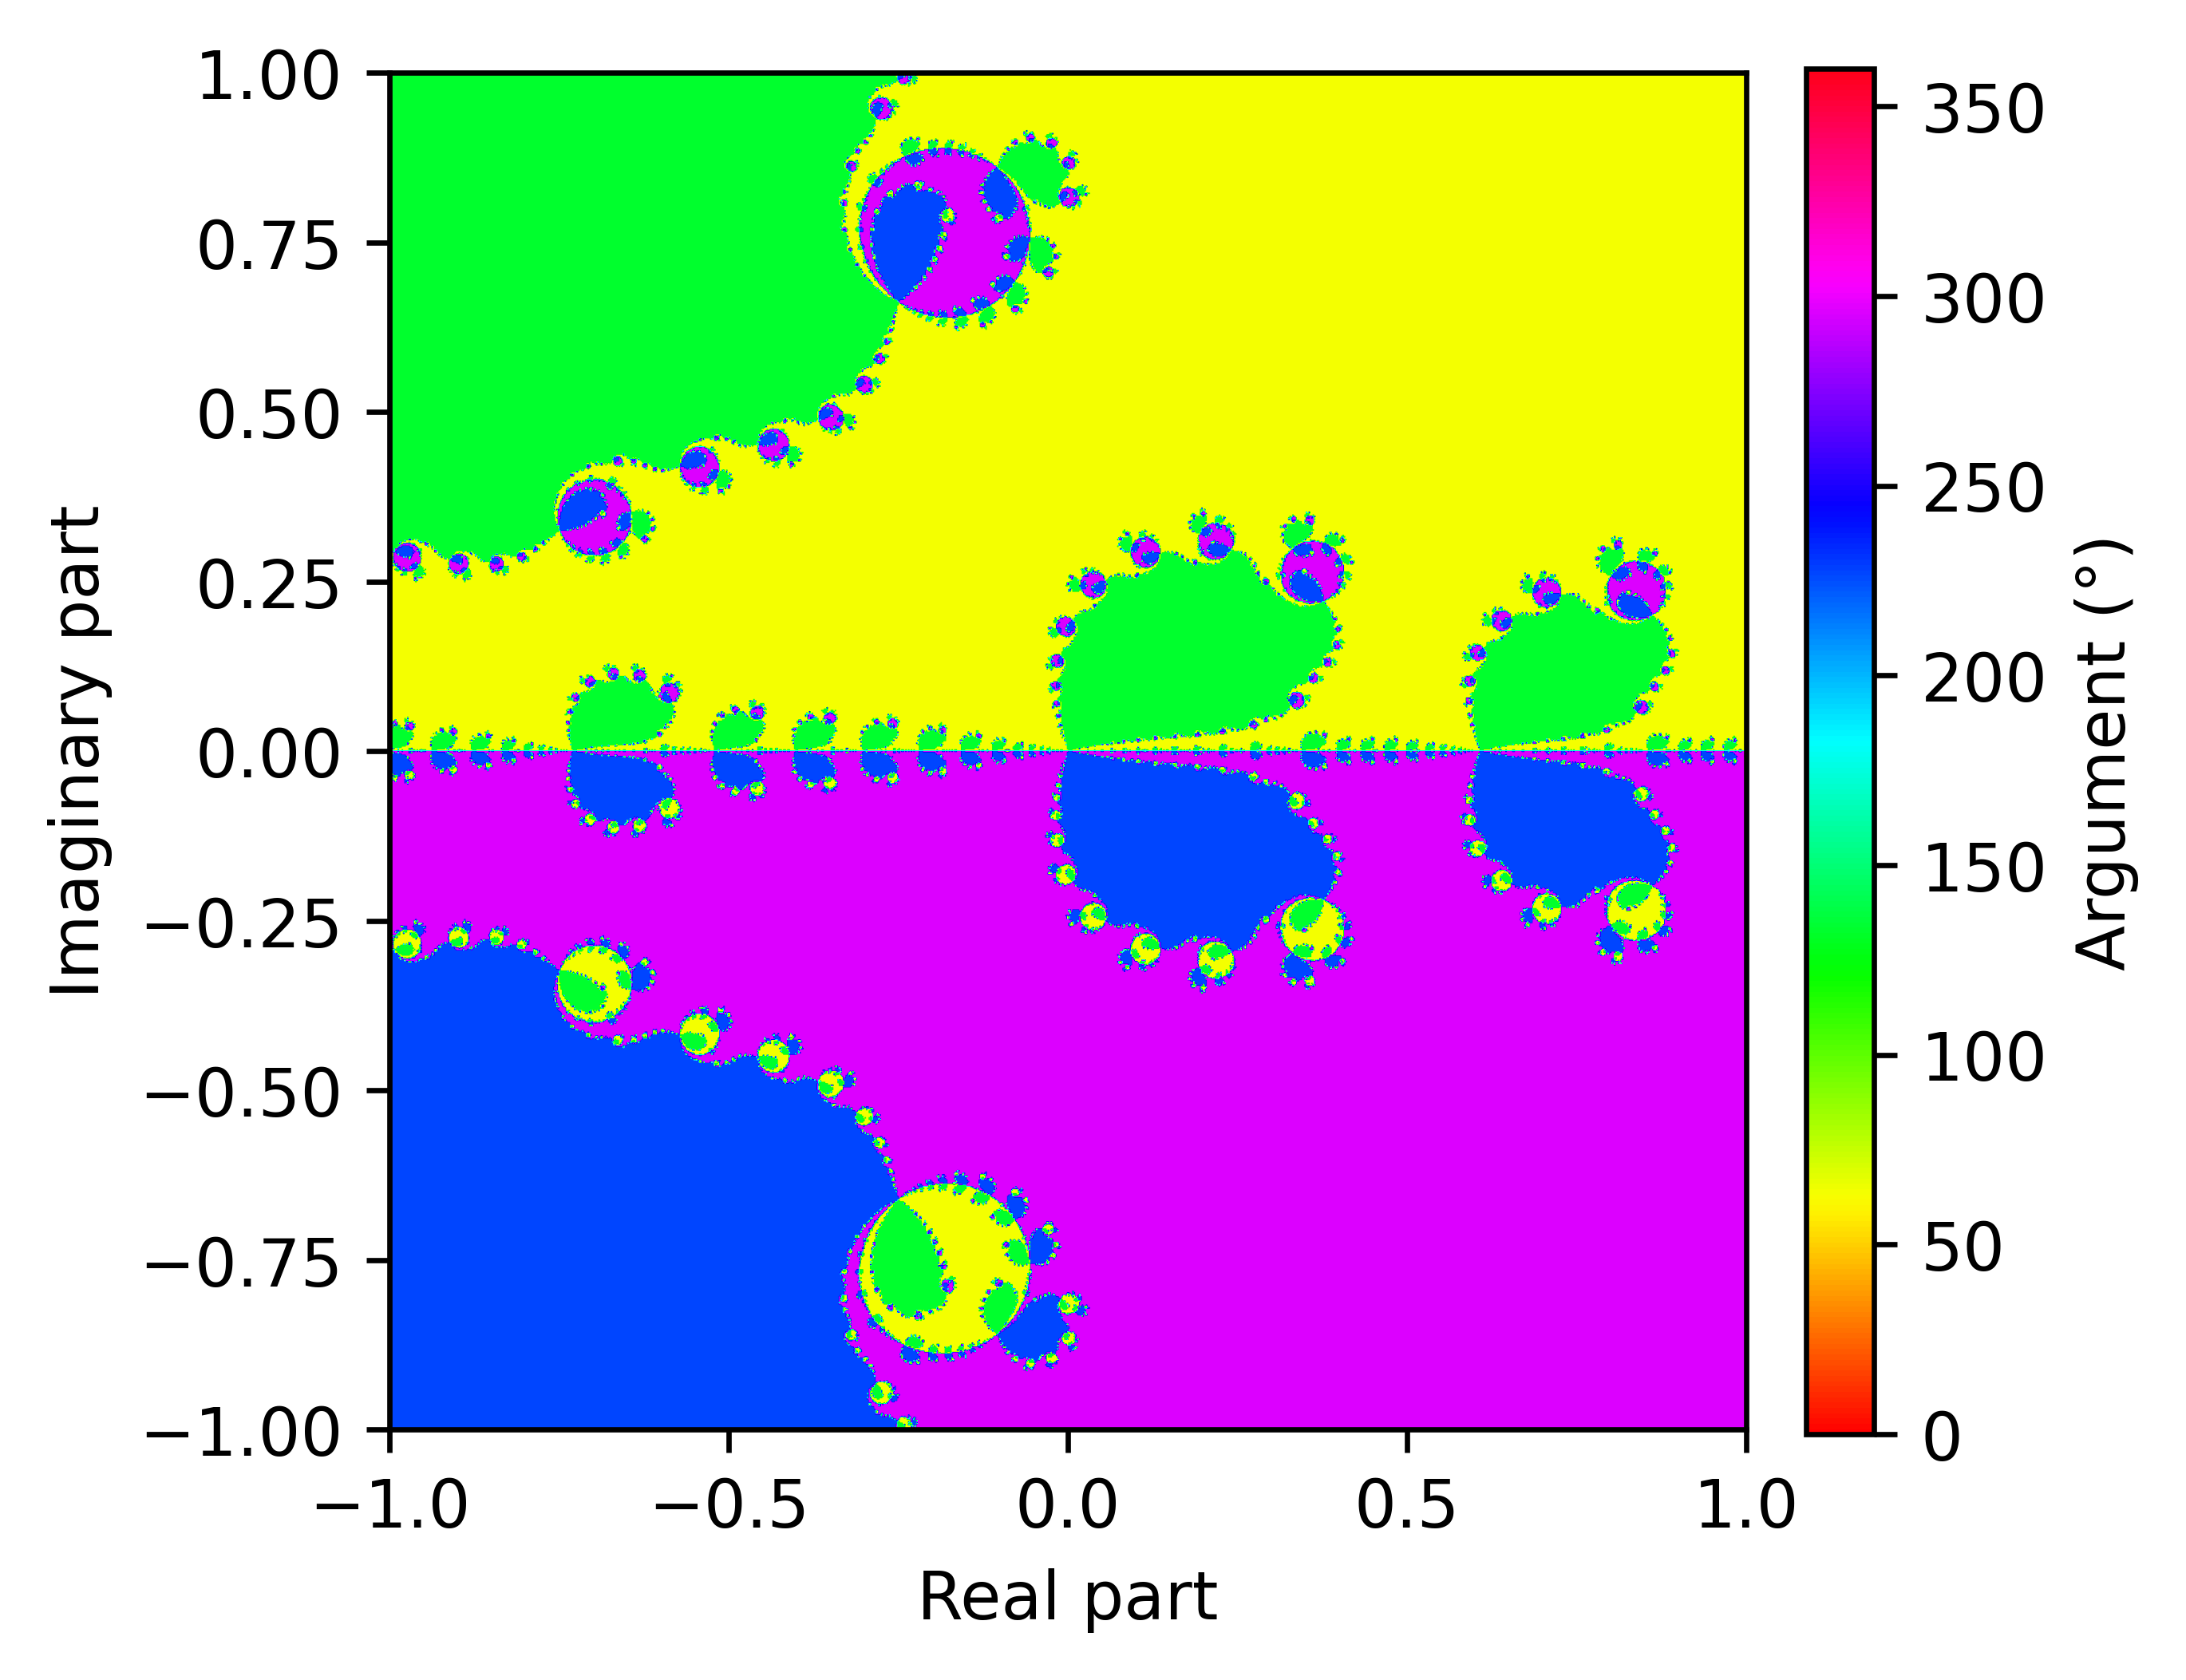

In [11]:
plot_complex(root_of_func)